* 참고 : [자동차 연비 예측하기: 회귀  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/regression)

* 보스턴 집값 데이터를 통해 텐서플로2로 회귀 모델 만들기
```
==============   ==============
Samples total               506
Dimensionality               13
Features         real, positive
Targets           real 5. - 50.
==============   ==============
```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
data = load_boston()

X, y = data.data, data.target
X.shape, y.shape

((506, 13), (506,))

In [3]:
# 해당 데이터의 피처명 입니다.
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
df = pd.DataFrame(X, columns=data.feature_names)
df["PRICE"] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. 판다스에 내장된 기능을 통해 전체 수치 변수에 대한 히스토그램을 그려주세요.
* 빈칸을 완성해 다음과 같은 형태의 그래프가 출력되도록 해주세요.

<img src="https://i.imgur.com/AreUECQ.png" width="500">

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0cba099890>,
      dtype=object)

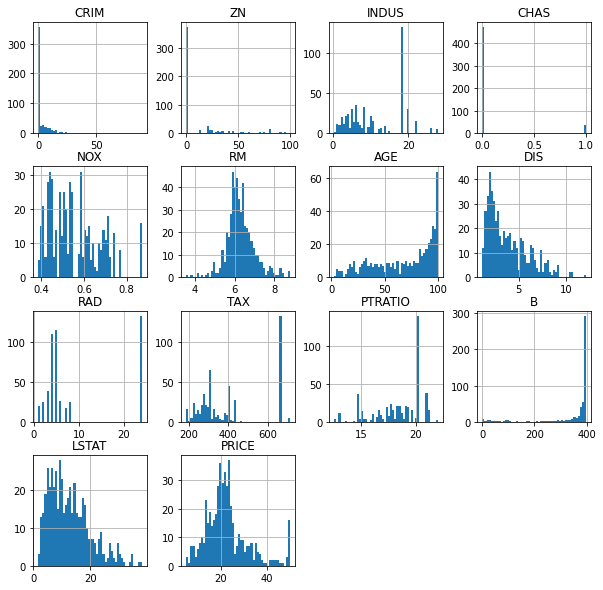

In [5]:
df.hist(figsize=(10, 10), bins=50)

In [6]:
# 학습세트와 예측세트를 분리합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

<img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="40%">

* 이미지 출처 : https://cs231n.github.io/neural-networks-1/

## 2. 딥러닝 레이어 만들기

* 다음 빈칸을 채워 회귀 모델이 되도록 입력층과 출력층을 완성해 주세요.

In [7]:
# input_shape 변수에 피처의 갯수를 담아 입력의 갯수를 만들어 줍니다.
input_shape = X_train.shape[1]
input_shape

13

In [8]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=([input_shape])),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])

## 3. 위에서 만든 레이어를 컴파일 해주세요.

* 측정 항목에 `'mae', 'mse'`가 들어가도록 해주세요.

In [9]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

## 4. 모델 요약값이 나오도록 빈칸에 알맞은 값을 입력해 주세요.

* 아래와 같은 형태가 출력되도록 합니다.

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
=================================================================
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________
```

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


## 5. 학습
* 아래의 코드 빈칸을 채워 위에서 만든 레이어로 모델이 학습을 할 수 있도록 완성해 주세요.
* 에포크마다 훈련 상태를 점검하기 위해 EarlyStopping 콜백(callback)을 사용하겠습니다. 지정된 에포크 횟수 동안 성능 향상이 없으면 자동으로 훈련이 멈춥니다.

In [12]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, 
                    epochs=100, validation_split = 0.2,
                    use_multiprocessing=True, verbose=0, callbacks=early_stop)

In [13]:
df_hist = pd.DataFrame(history.history)
df_hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse
0,1844.110596,31.425053,1844.110596,142.266632,9.067281,142.266632
1,948.350342,24.612974,948.350342,96.035683,6.910130,96.035683
2,735.895935,20.557453,735.895935,104.604958,8.602682,104.604958
3,514.255859,17.218760,514.255859,142.428940,8.882744,142.428940
4,356.165741,14.765116,356.165741,145.754272,10.164026,145.754272


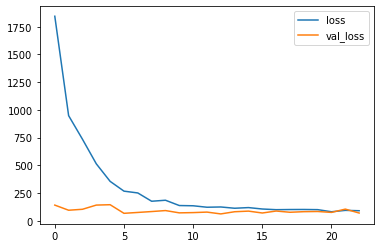

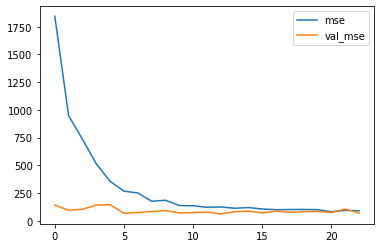

In [14]:
hist = pd.DataFrame(history.history)
hist[["loss", "val_loss"]].plot()
hist[["mse", "val_mse"]].plot()

## 6. 평가
* 빈칸을 완성해 모델의 성능을 측정해 주세요.

In [15]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

4/4 - 0s - loss: 43.8858 - mae: 4.1404 - mse: 43.8858


## 7. 예측
* 빈칸을 완성해 학습한 모델을 바탕으로 예측할 수 있도록 해주세요.
* 예측값은 1차원 벡터가 되도록 만들어 주세요.

In [18]:
y_predict = model.predict(X_test).flatten()
y_predict[:5]

array([21.511019, 25.080362, 16.45042 , 22.108288, 15.914068],
      dtype=float32)

* 예측값과 실제값의 차이를 구합니다.

In [19]:
error = y_test - y_predict
error[:5]

array([ 2.08898125,  7.31963768, -2.85042038,  0.69171219,  0.18593178])

## 8. MAE(Mean Absolute Error) 값을 직접 구해주세요.
* 실제값(y_test)과 예측값(y_predict)의 차이의 절대값의 평균 값을 계산해 주세요.
* 위에서 model.evaluate로 구한 mae 값과 비슷한 값이 나오도록 직접 파이썬 코드로 구현해 주세요.
* (소숫점 뒷자리 값이 달라질 수 있습니다.)

In [20]:
mae = abs(error).mean()
mae

4.14036352653203

## 9. MSE(Mean Squared Error) 값을 직접 구해주세요.

In [23]:
# 실제값 - 예측값의 차이의 제곱의 평균
# MAE와 비슷해 보이나 제곱을 통해 음수를 양수로 변환합니다.
# 분산과 유사한 공식입니다.

mse = (np.square(error)).mean()
mse

43.88576758360407

## 10. RMSE(Root Mean Squared Error) 값을 직접 구해주세요.

In [24]:
# MSE 값에 Root를 취함, 표준편차와 유사한 공식 입니다.
rmse = np.sqrt(mse)
rmse

6.624633392392674